<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [3]:

data=pd.read_csv(r'D:\Dice analytics\project 2\HR Churn Prediction Project-2\HR_comma_sep.csv')
df=data.copy()

In [3]:
df[df['dept'] == 'sales']

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14967,0.43,0.51,2,128,3,0,1,0,sales,low
14968,0.40,0.47,2,128,3,0,1,0,sales,medium
14969,0.43,0.46,2,157,3,0,1,0,sales,medium
14970,0.78,0.93,4,225,5,0,1,0,sales,medium


In [4]:

df.shape

(14999, 10)

In [5]:

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [7]:

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [8]:

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

In [10]:

df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [11]:
df.left.value_counts(normalize=True).round(2)

0    0.76
1    0.24
Name: left, dtype: float64

**Question:What can you interpret from the plot above?** 

Answer: we interpret that 76% of the employees has not left the company and 24% of the employee has left the company.

In [12]:

df.number_project.value_counts()


4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [13]:
df.number_project.value_counts(normalize=True).round(2)

4    0.29
3    0.27
5    0.18
2    0.16
6    0.08
7    0.02
Name: number_project, dtype: float64

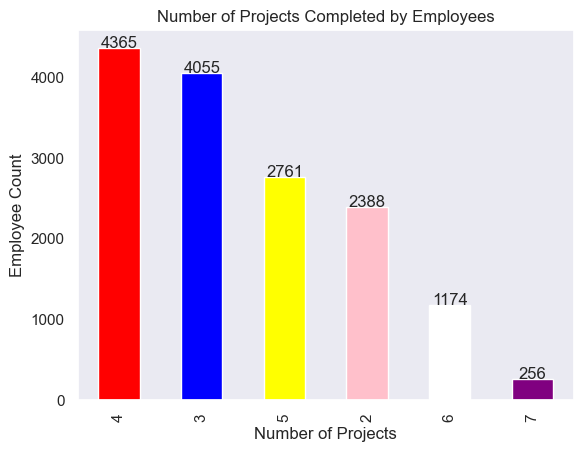

In [14]:

color=['red','blue','yellow','pink','white','purple']
df.number_project.value_counts().plot(kind='bar', color=color)

# Add a title
plt.title("Number of Projects Completed by Employees")

# Add axis labels
plt.xlabel("Number of Projects")
plt.ylabel("Employee Count")

# Add annotations
for i, count in enumerate(df.number_project.value_counts()):
    plt.text(i, count+0.5, str(count), ha='center')

# Add a background color
#plt.style.use('seaborn-whitegrid')
plt.style.use('dark_background')
# Remove grid lines
plt.grid(False)



# Show the plot
plt.show()

**Question: What insights can you infer from the above plot?**

Answer: Most of the employees done 4 projects and only 256 emplyees done 7 project. So, we can say that only few employees in company has done most of the project and his experince has more in company and his contribution in the company has more.

In [15]:
df_left=df[df.left==1]
df_left.groupby('number_project')['left'].value_counts()

number_project  left
2               1       1567
3               1         72
4               1        409
5               1        612
6               1        655
7               1        256
Name: left, dtype: int64

In [16]:
df_left.groupby('left')['number_project'].value_counts()

left  number_project
1     2                 1567
      6                  655
      5                  612
      4                  409
      7                  256
      3                   72
Name: number_project, dtype: int64

In [17]:
#pd.pivot_table(df,index='number_project',columns='left',values='time_spend_company',aggfunc='mean')

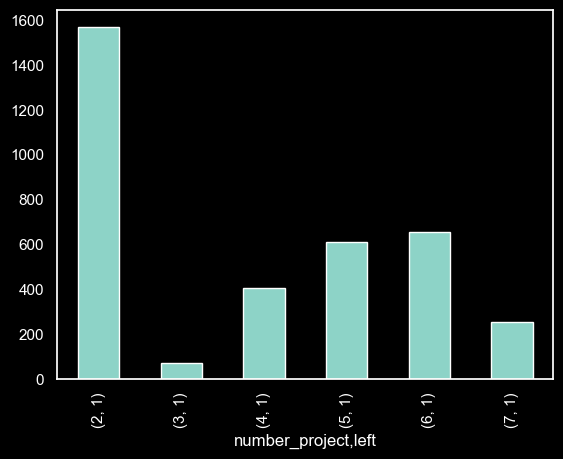

In [18]:
df_left.groupby('number_project')['left'].value_counts().plot(kind="bar")
plt.grid(False)


**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: The maximum emplyees leave company who done 2 projects and the reason behind maybe low salary or there satisfaction may be low or other company approch him with good salary and facilies

## **Time spent at the company**

In [19]:

df.time_spend_company.value_counts().reset_index()

,index,time_spend_company
0,3,6443
1,2,3244
2,4,2557
3,5,1473
4,6,718
5,10,214
6,7,188
7,8,162


In [20]:
df.time_spend_company.value_counts(normalize=True).round(2).reset_index()

,index,time_spend_company
0,3,0.43
1,2,0.22
2,4,0.17
3,5,0.10
4,6,0.05
5,10,0.01
6,7,0.01
7,8,0.01


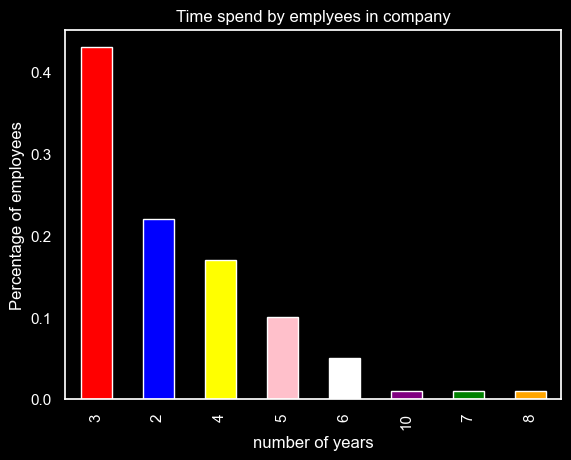

In [21]:
color=['red','blue','yellow','pink','white','purple','green','orange']
df.time_spend_company.value_counts(normalize=True).round(2).plot(kind='bar',color=color)
plt.title("Time spend by emplyees in company")
plt.xlabel("number of years")
plt.ylabel("Percentage of employees")
plt.grid(False)


**Question: What is the maximum number of time spend by the employees?**

Answer:  maximum number of time spend by the employees is 3 years in company means 43% employees maximam spend 3 years in company.

In [22]:

df_left.time_spend_company.value_counts()

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

In [23]:
df_left.time_spend_company.value_counts(normalize=True).round(2)

3    0.44
4    0.25
5    0.23
6    0.06
2    0.01
Name: time_spend_company, dtype: float64

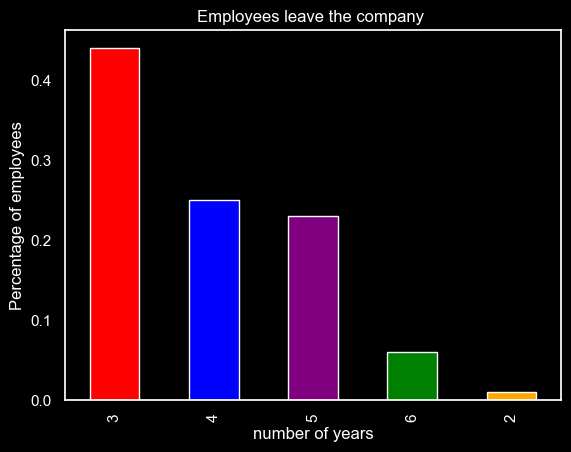

In [24]:

color=['red','blue','purple','green','orange']
df_left.time_spend_company.value_counts(normalize=True).round(2).plot(kind='bar',color=color)
plt.title("Employees leave the company ")
plt.xlabel("number of years")
plt.ylabel("Percentage of employees")
plt.grid(False)

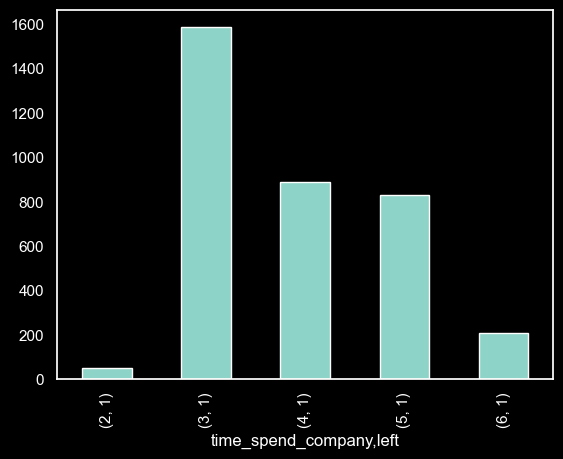

In [25]:
df_left.groupby('time_spend_company')['left'].value_counts().plot(kind="bar")
plt.grid(False)

**Question: After what time period are employees most likely to leave the company ?**

Answer:After 3 years of time period are employees most likely to leave the company. means 44% employees leave the comapny after 3 years

## **Employees engaged in any work accident**

C:\Users\PCS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_accident', ylabel='count'>

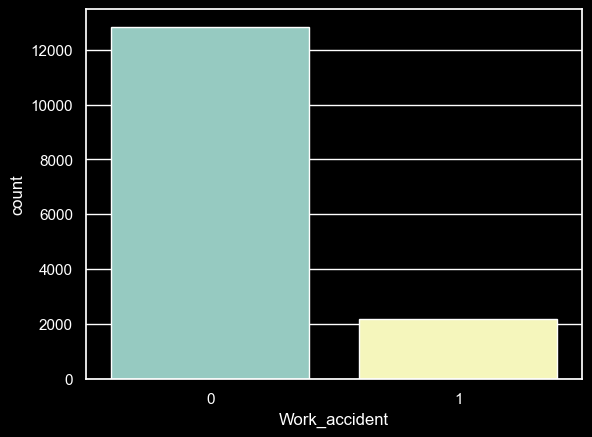

In [27]:

sns.countplot(df.Work_accident)

**Question: What can you conclude from the graph above?**

Answer: moajority of emplyees are not the part of company of the company only few emplyees are the part of the company.

In [36]:

df_inv=df[df.Work_accident==1]
df_inv.groupby(['Work_accident', 'left']).size().reset_index()

,Work_accident,left,0
0,1,0,2000
1,1,1,169


## **Promotions in last 5 years**

In [37]:

df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [38]:
df.promotion_last_5years.value_counts(normalize=True).round(2)

0    0.98
1    0.02
Name: promotion_last_5years, dtype: float64

In [39]:
pd.crosstab(df["promotion_last_5years"],df["left"],normalize=False)

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


Answer: so 319 employees are promoted in 5 yeasrs and only 19 emplyees are leave.

## **Salary trends**

In [40]:
df.salary.value_counts(normalize=True).round(2)

low       0.49
medium    0.43
high      0.08
Name: salary, dtype: float64

C:\Users\PCS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


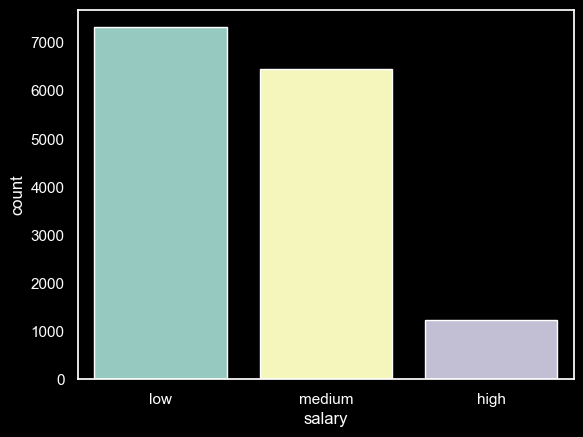

In [41]:

sns.countplot(df.salary)
plt.grid(False)

Answer: The salary trend is that most of the emplyees(49%) have low slary and 43% of the employees have medium salary and 8% of the employees have high salary

In [42]:

df.groupby('salary')['left'].value_counts(normalize=True).round(2)

salary  left
high    0       0.93
        1       0.07
low     0       0.70
        1       0.30
medium  0       0.80
        1       0.20
Name: left, dtype: float64

In [43]:
pd.crosstab(df.salary,df.left,normalize=False)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


C:\Users\PCS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

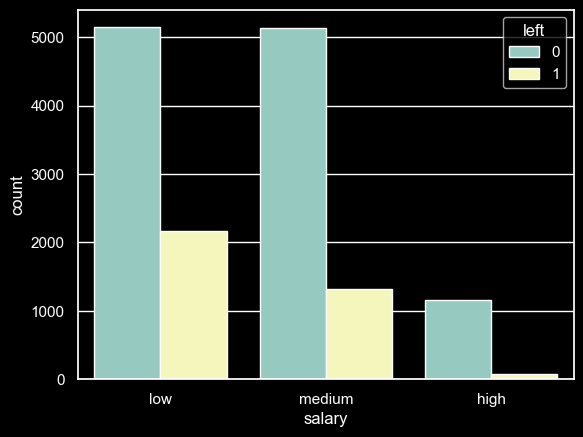

In [44]:

sns.countplot(df.salary,hue=df.left)

**Question: What does the above plot show?**

Answer:The above plot show that most of the emplyees has low salary leave the company

## **Employees per Department**

<AxesSubplot:xlabel='count', ylabel='dept'>

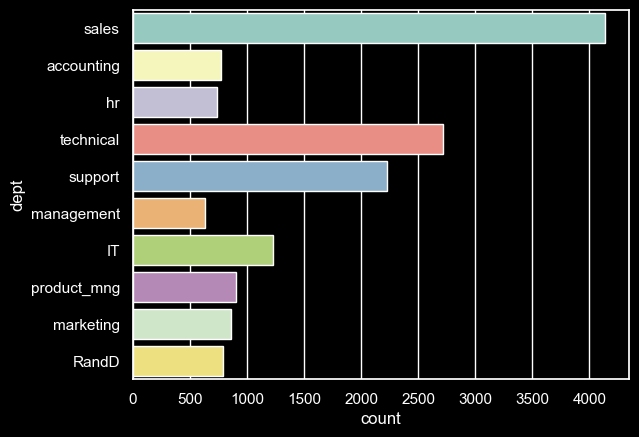

In [45]:

sns.countplot(y=df.dept)

<AxesSubplot:xlabel='count', ylabel='dept'>

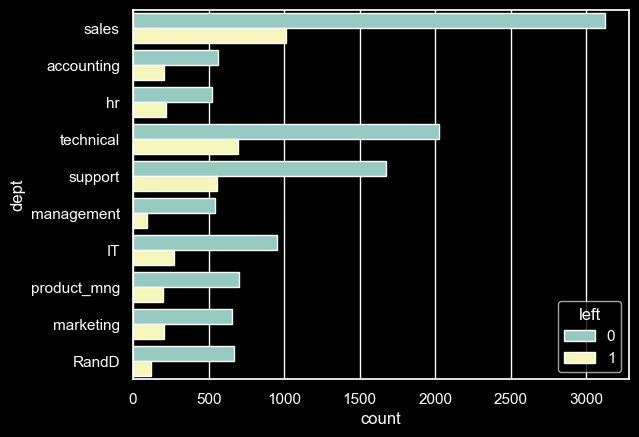

In [46]:
sns.countplot(y=df.dept,hue=df.left)

**Question: Which department has maximum number of employees?**

Answer:Sales department has highest number of employees.

In [47]:

df_left.dept.value_counts(normalize=True).round(2)

sales          0.28
technical      0.20
support        0.16
IT             0.08
hr             0.06
accounting     0.06
marketing      0.06
product_mng    0.06
RandD          0.03
management     0.03
Name: dept, dtype: float64

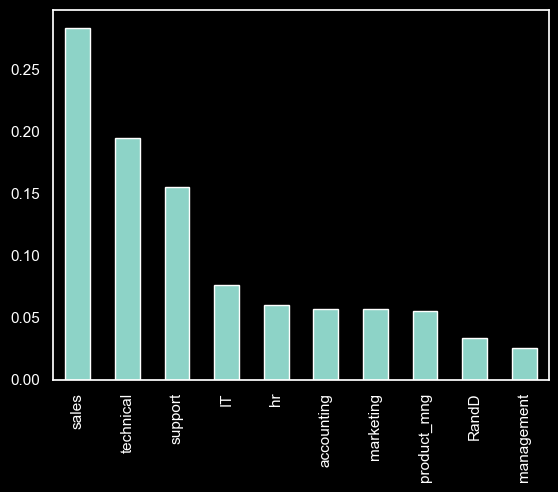

In [48]:

df_left.dept.value_counts(normalize=True).plot(kind='bar')
plt.grid(False)

Answer: Sales department has highest percentage(28%) of turn-over.

## **Satisfaction Level**

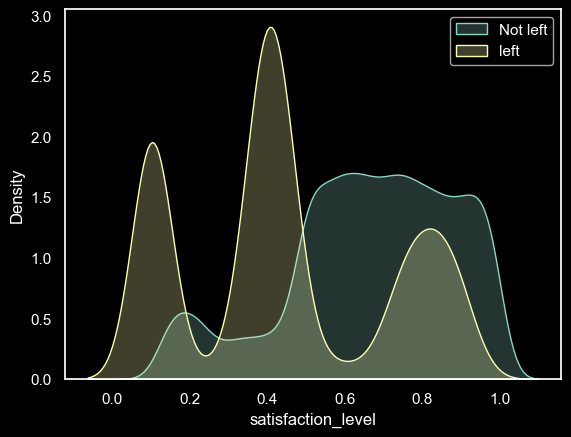

In [49]:
# Write the code here
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'],shade=True,label="Not left");
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], shade=True,label="left");
plt.legend()
plt.grid(False)

**Question: What can you conclude from the plot above?**

Answer:Most of the employees who left the company has satisfaction level(0.2-0.6), so we say that the majority of employees who left the company has not much satisfy to leave the company and there is few employeses who left the company has high satisfy leve
    We see that the employees who does not leave the compamy has satisfaction level has strong in range (0.5-1.0)

# Feature Engineering

In [50]:

df['satisfaction_level_type']=' '
df.loc[df.satisfaction_level>=0.5,'satisfaction_level_type']='High'
df.loc[df.satisfaction_level<0.5,'satisfaction_level_type']='Low'


In [51]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


C:\Users\PCS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


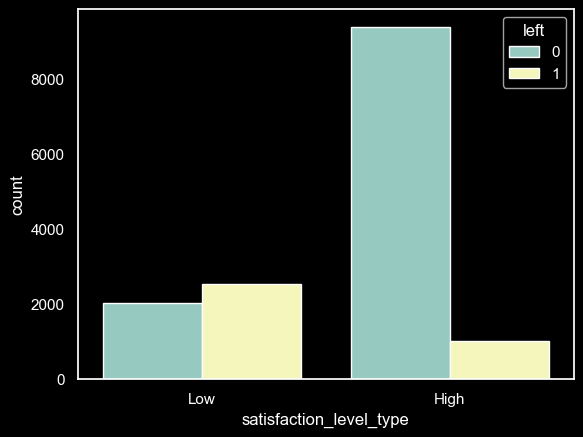

In [52]:

sns.countplot(df.satisfaction_level_type, hue=df.left)
plt.grid(False)
plt.show()

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [53]:
df.groupby('number_project')['left'].value_counts(normalize=True).round(2).reset_index(name='perc')

,number_project,left,perc
0,2,1,0.66
1,2,0,0.34
2,3,0,0.98
3,3,1,0.02
4,4,0,0.91
5,4,1,0.09
6,5,0,0.78
7,5,1,0.22
8,6,1,0.56
9,6,0,0.44


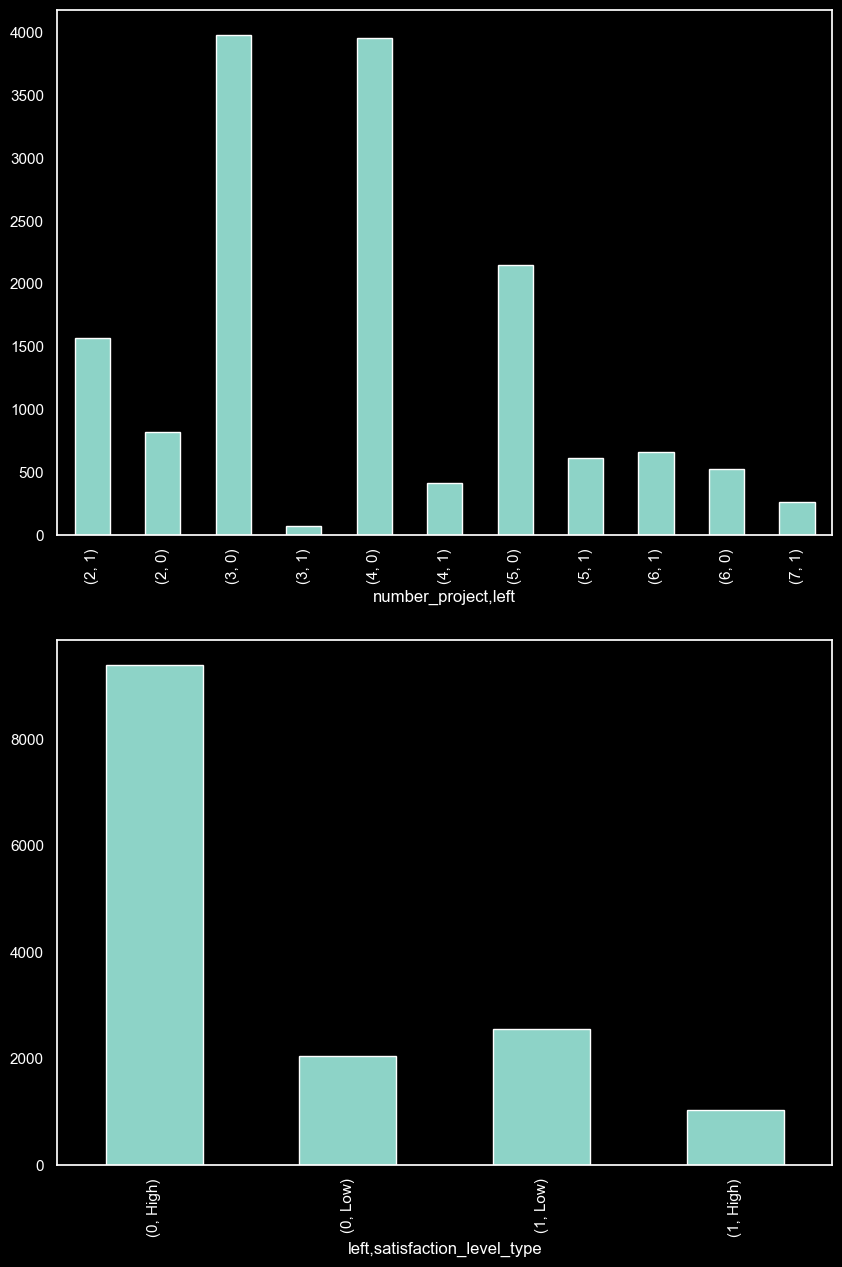

In [54]:
#df.groupby('number_project')['left'].value_counts(normalize=True).round(2).reset_index(name='perc')
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df.groupby('number_project')['left'].value_counts(normalize=False).round(2).plot(kind='bar')
plt.grid(False)
plt.subplot(2,1,2)
df.groupby('left')['satisfaction_level_type'].value_counts().round(2).plot(kind='bar')
plt.grid(False)

In [55]:

df.groupby('left')['satisfaction_level_type'].value_counts(normalize=True).round(2).reset_index(name='perc')

,left,satisfaction_level_type,perc
0,0,High,0.82
1,0,Low,0.18
2,1,Low,0.71
3,1,High,0.29


**Make a Plot of your findings**

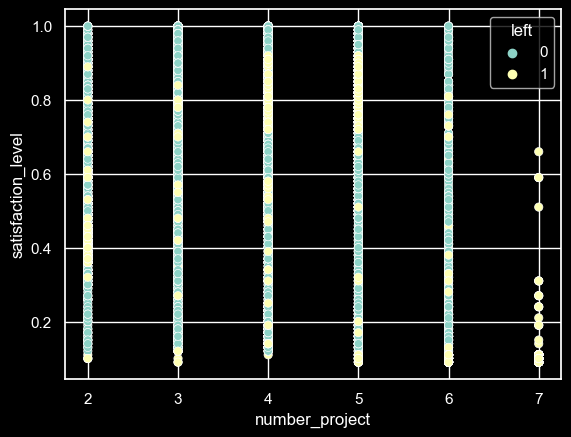

In [56]:
sns.scatterplot(x=df.number_project,y=df.satisfaction_level,hue=df.left)
plt.grid("false")
plt.show()

**Question:** What did you infer drom the above plot

**Answer:** we see that the employees who done 7 projects has left the company.But we see over all data so low satisfaction employees leave the company more the high satisfaction.

Now lets check number of projects for low satisfaction level

In [57]:

pd.crosstab(df.number_project,df.satisfaction_level_type)

satisfaction_level_type,High,Low
number_project,,
2,591,1797
3,3504,551
4,3807,558
5,2281,480
6,228,946
7,5,251


In [58]:
df.groupby('number_project')['satisfaction_level_type'].value_counts(normalize=True).round(2).reset_index(name='perc')

,number_project,satisfaction_level_type,perc
0,2,Low,0.75
1,2,High,0.25
2,3,High,0.86
3,3,Low,0.14
4,4,High,0.87
5,4,Low,0.13
6,5,High,0.83
7,5,Low,0.17
8,6,Low,0.81
9,6,High,0.19


Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

In [59]:
df['employee_type']=''

In [60]:
# Write code here
df.loc[df.number_project==2,'employee_type']='unburdened'
df.loc[(df.number_project>=3)& (df.number_project<=5),'employee_type']='Satisfactory'
df.loc[df.number_project>=6,'employee_type']='Burdened'

In [61]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,unburdened


C:\Users\PCS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employee_type', ylabel='count'>

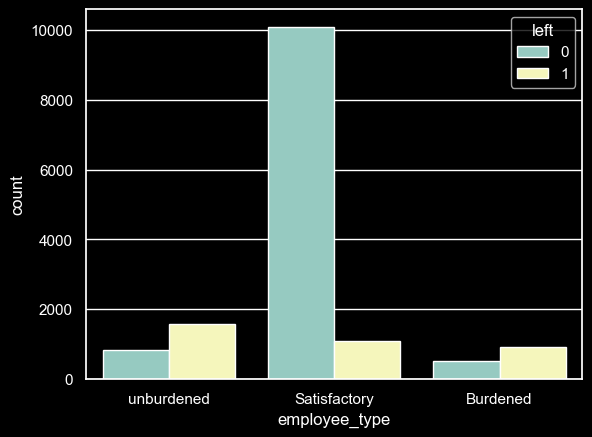

In [62]:

sns.countplot(df.employee_type,hue=df.left)

### Remove Redundant Features

<AxesSubplot:>

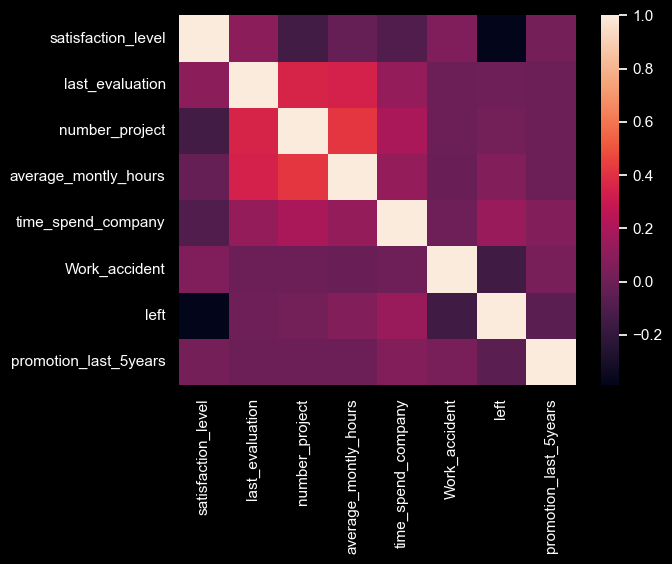

In [63]:
# Write code here
a=df.corr()
sns.heatmap(a)

In [64]:
df.drop('satisfaction_level',axis=1,inplace=True)

In [65]:
df.drop('number_project',axis=1,inplace=True)

In [66]:
df.columns

Index(['last_evaluation', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'dept', 'salary',
       'satisfaction_level_type', 'employee_type'],
      dtype='object')

# Machine Learning

In [67]:
one_df=pd.get_dummies(df,columns=['dept','salary','satisfaction_level_type','employee_type'],drop_first=True)

In [68]:
one_df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium,satisfaction_level_type_Low,employee_type_Satisfactory,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,0.86,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1


In [69]:

X=one_df.drop('left',axis=1)


In [70]:
Y=one_df[['left']]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
#Write code here
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.70,random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)


(10499, 19) (10499, 1)
(4500, 19) (4500, 1)


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf=RandomForestClassifier(random_state=25)

In [75]:
rf.fit(xtrain,ytrain)

C:\Users\PCS\AppData\Local\Temp\ipykernel_15332\2224009558.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier(random_state=25)

In [76]:
rf_pred=rf.predict(xtest)

In [77]:
rf_pred[0:9]

array([0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

**Precision**

In [78]:
from sklearn.metrics import precision_score

In [79]:
rf_precion=precision_score(ytest,rf_pred)
print('precision is: ',rf_precion)

precision is:  0.9746001881467544


**Accuracy**

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
rf_acc=accuracy_score(ytest,rf_pred)
print("accuracy is: ",rf_acc)

accuracy is:  0.9824444444444445


**Recall**

In [82]:
from sklearn.metrics import recall_score

In [83]:
rf_recall=recall_score(ytest,rf_pred)
print("recall is: ",rf_recall)

recall is:  0.9522058823529411


**F1-Score**

In [84]:
from sklearn.metrics import f1_score

In [85]:
rf_f1_score=f1_score(ytest,rf_pred)
print("f1 score is: ",rf_f1_score)

f1 score is:  0.9632728963272896


**Classification Report**

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.97      0.95      0.96      1088

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr=LogisticRegression(random_state=25)

In [90]:
lr.fit(xtrain,ytrain)

C:\Users\PCS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PCS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=25)

In [91]:
lr_pred=lr.predict(xtest)

**Accuracy**

In [92]:
lr_accuracy=accuracy_score(ytest,lr_pred)
print("acuuracy score:",lr_accuracy)

acuuracy score: 0.8626666666666667


**Precision**

In [93]:
lr_precision=precision_score(ytest,lr_pred)
print("precision score:",lr_precision)

precision score: 0.7478902953586498


**Recall**

In [94]:
lr_recall=recall_score(ytest,lr_pred)
print("recall score:",lr_recall)

recall score: 0.6516544117647058


**F1 Score**

In [95]:
lr_f1_score=f1_score(ytest,lr_pred)
print("f1 score:",lr_f1_score)

f1 score: 0.6964636542239686


**Classification Report**

In [96]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3412
           1       0.75      0.65      0.70      1088

    accuracy                           0.86      4500
   macro avg       0.82      0.79      0.80      4500
weighted avg       0.86      0.86      0.86      4500



## Ada Boost

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
adb=AdaBoostClassifier(random_state=25)

In [99]:
adb.fit(xtrain,ytrain)

C:\Users\PCS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=25)

In [100]:
pred_clf_adb=adb.predict(xtest)

**Accuracy**

In [101]:
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
print("accuracy score: ",ab_accuracy)

accuracy score:  0.9288888888888889


**Precision**

In [102]:
ab_precision= precision_score(ytest,pred_clf_adb)
print('precision score :',ab_precision)

precision score : 0.8555555555555555


**Recall**

In [103]:
ab_recall= recall_score(ytest,pred_clf_adb)

**F1-Score**

In [104]:
ab_f1_score=f1_score(ytest,pred_clf_adb)

**Classification Report**

In [105]:
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3412
           1       0.86      0.85      0.85      1088

    accuracy                           0.93      4500
   macro avg       0.90      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [106]:

#!pip install xgboost

In [107]:
import xgboost as xgb

In [108]:
clf_xgb = xgb.XGBClassifier(random_state=25)

In [109]:
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=25, ...)

In [110]:
pred_clf_xgb=clf_xgb.predict(xtest)

**Accuracy**

In [111]:

xgb_accuracy=accuracy_score(ytest,pred_clf_xgb)

**Precision**

In [112]:

xgb_precision=precision_score(ytest,pred_clf_xgb)

**Recall**

In [113]:

xgb_recall= recall_score(ytest,pred_clf_xgb)

**F1-Score**

In [114]:

xgb_f1_score=f1_score(ytest,pred_clf_xgb)

**Classification Report**

In [115]:

print(classification_report(ytest,pred_clf_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.96      0.95      0.95      1088

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

In [116]:

comparison_dict={"Algorithm":['Logistic Regression',"Random Forest","XGBoost","Ada Boost"],
                 "Accuracy":[lr_accuracy,rf_acc,xgb_accuracy,ab_accuracy],
                 "Precision":[lr_precision,rf_precion,xgb_precision,ab_precision],
                 "Recall":[lr_recall,rf_recall,xgb_recall,ab_recall],
                 "F1 Score":[lr_f1_score,rf_f1_score,xgb_f1_score,ab_f1_score]
                }

In [117]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.982444,0.974600,0.952206,0.963273
2,XGBoost,0.977778,0.960821,0.946691,0.953704
3,Ada Boost,0.928889,0.855556,0.849265,0.852399
0,Logistic Regression,0.862667,0.747890,0.651654,0.696464


Answer: Random forest give the best result But XGboost is similar to random result so tunning the random forest parameter and XGboost parameter,so that which model give good result in tuning parameter so the model is right for your problem.

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=25)


In [120]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
}


In [121]:
# perform grid search with cross-validation
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [122]:
# print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 500}
Best score:  0.9829510197599765


In [123]:
model=grid_search.best_estimator_

In [124]:
model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=25, ...)

In [125]:
pre_final=model.predict(xtest)

In [126]:
print(classification_report(ytest,pre_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.96      0.95      0.96      1088

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [127]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.97      0.95      0.96      1088

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [135]:
param_grid1 = {"n_estimators": [9, 18, 27, 36, 45, 54, 63],
               "max_depth": [1, 5, 10, 15, 20, 25, 30],
               "min_samples_leaf": [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=25)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain, ytrain)

# RF_cv1.cv_results_,
RF_cv1.best_params_, RF_cv1.best_score_

C:\Users\PCS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


({'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 54},
 0.9843797726808685)

In [136]:
RF_grid = RF_cv1.best_estimator_

In [137]:
RF_grid.fit(xtrain, ytrain)

C:\Users\PCS\AppData\Local\Temp\ipykernel_15332\4208728583.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_grid.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=20, n_estimators=54, random_state=25)

In [138]:
rf_pred_t = RF_grid.predict(xtest)

In [139]:
print(classification_report(ytest,rf_pred_t))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3412
           1       0.97      0.96      0.96      1088

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



so final model is random forest tuning bcz recall increase in this tuning and acuuracy be much better.